### Introduction
While scrolling through the WPDRC datasets, I realized that many were regarding heavy topics such as crime and fires. While it is important data that can say a lot about a neighborhood, I wanted to pick a more fun or lighthearted metric.

When I imagine a good neighborhood, I think of somewhere that is both peaceful and friendly. I think a playground is the perfect embodiment of these characteristics. I found a dataset that contained all the playgrounds in the City of Pittsburgh, so I knew it was what I wanted to analyze.

### The Metric

My metric is simple: a count of the number of playgrounds in each neighborhood. From there, the neighborhoods are ranked by highest number of playgrounds to least. The dataset I simply lists all playgrounds in the city and provides some information about each, including neighborhood and address. 

#### The Best Neighborhood

The first step was to import the pandas and geopandas libraries, which are used for data processing and visualization. Then, I had to read the playground data into a pandas dataframe and the neighborhood shapefile into a geopandas dataframe.

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

playgrounds = pd.read_csv("playgrounds.csv")
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

Then, I added a series to my playgrounds dataframe that gave each a playground a value of 1, so that I could sum the number of playgrounds for each neighborhood. Once that series was added to the existing dataframe, I grouped and sorted by number of playgrounds per neighborhood. Finally, we can see which neighborhood has the most playgrounds out of the entire city.

In [12]:
has_playground = []
for i in range(len(playgrounds['neighborhood'])):
    has_playground.append(1)
playgrounds['has_playground'] = has_playground
num_playgrounds = playgrounds.groupby("neighborhood").sum()['has_playground']
num_playgrounds = num_playgrounds.sort_values(ascending=False)
print(num_playgrounds)
num_playgrounds.to_csv('ranking.csv')

neighborhood
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
Lower Lawrenceville     2
Westwood                2
Strip District          1
West Oakland            1
Name: has_playground, Length: 68, dtype: int64


In [13]:
print(num_playgrounds.head())
num_playgrounds['neighborhood'].value_counts().sort_index().plot(kind='bar', rot=0)

neighborhood
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
Name: has_playground, dtype: int64


KeyError: 'neighborhood'

The final step was to create a visualization. To do this, I had to merge the playgrounds dataframe with the geopandas neighborhood one. After that, all that was left was to plot the result, which is basically a heatmap of playgrounds in the city.

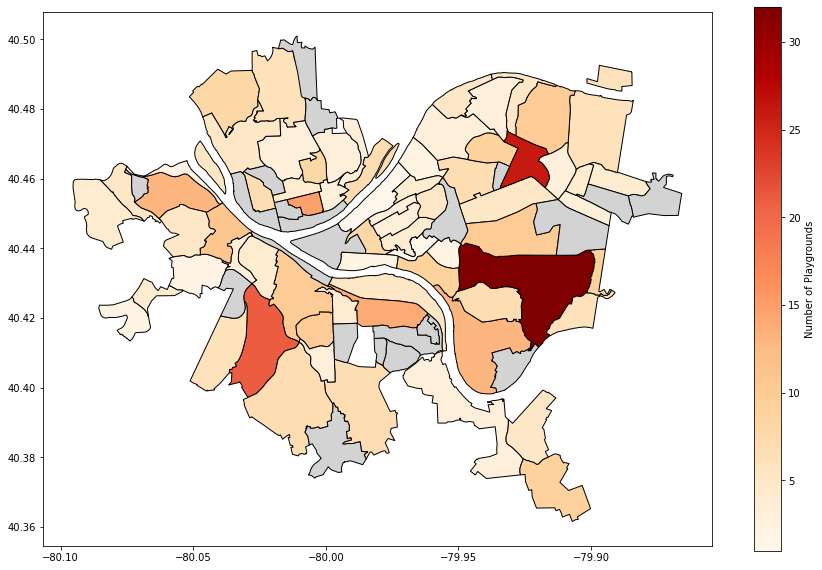

In [4]:
playgrounds_map = neighborhoods.merge(num_playgrounds, how='left', left_on='hood', right_on='neighborhood')
playgrounds_map.plot(column='has_playground', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Conclusion

I was not surprised at all that Squirrel Hill South was the best ranked by my playgrounds metric. I've been to Squirrel Hill and could tell that it was a nice neighborhood. I was slightly surprised that it was so high compared to the other top finishers, but I realized why. Squirrel Hill South encompasses Schenley Park, which quickly explains why it is so high. Schenley Park is a large park with many playgrounds, and because the park is in Squirrel Hill South, the neighborhood is ranked highly. The other top finishers generally also have large public parks, which makes complete sense because that is where playgrounds usually are.